In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [11]:
df['normalized-losses'].loc[df['normalized-losses'] == '?'].count()

41

In [13]:
#semua kolom normal-losses yang bukan ? saya taruh dalam variabel nl
nl = df['normalized-losses'].loc[df['normalized-losses'] != '?']
#mencari nilai rata-rata normal_loses
nlmean = nl.astype(str).astype(int).mean()
#nilai rata-rata tersebut di embed-kan ke normal_losses yang berupa ?
df['normalized-losses'] = df['normalized-losses'].replace('?',nlmean).astype(int)
#tampilkan hasilnya
df['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [14]:
df['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [15]:
df['price'].loc[df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [16]:
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [17]:
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',pmean).astype(int)

In [18]:
df['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int32

In [19]:
df['bore'].loc[df['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [7]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
df.mean()

C:\Users\sas\AppData\Local\Temp\ipykernel_16520\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


symboling               0.834146
wheel-base             98.756585
length                174.049268
width                  65.907805
height                 53.724878
curb-weight          2555.565854
engine-size           126.907317
compression-ratio      10.142537
city-mpg               25.219512
highway-mpg            30.751220
dtype: float64

In [7]:
df.median()

year                  1970.500000
acousticness             0.452951
danceability             0.544746
duration_ms         234673.799962
energy                   0.498728
instrumentalness         0.124916
liveness                 0.207946
loudness               -11.761679
speechiness              0.086237
tempo                  117.597018
valence                  0.548000
popularity              33.655500
key                      5.000000
mode                     1.000000
dtype: float64

In [8]:
df.mode()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.228712,0.403515,167904.541667,0.204252,0.035948,0.167161,-19.179958,0.051050,100.397758,0.373623,0.138889,7.0,1.0
1,1922,0.236197,0.425661,169983.425325,0.207143,0.039052,0.167779,-17.713484,0.053003,101.376139,0.414465,0.211690,NaN,NaN
2,1923,0.237614,0.436234,170391.501144,0.227028,0.058262,0.171781,-17.316193,0.054633,102.590531,0.423354,0.327922,NaN,NaN
3,1924,0.239382,0.439915,178356.301775,0.236784,0.058543,0.177048,-17.095437,0.054874,106.195246,0.425495,0.351562,NaN,NaN
4,1925,0.241118,0.441623,179379.573460,0.237026,0.061076,0.177988,-17.014042,0.055645,106.197030,0.428594,0.603376,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016,0.940088,0.644215,258175.421000,0.671269,0.448218,0.238647,-6.993948,0.244092,123.405676,0.624788,61.371254,NaN,NaN
96,2017,0.943474,0.647005,259626.214500,0.673011,0.468505,0.239118,-6.957376,0.306672,123.436965,0.635153,63.111048,NaN,NaN
97,2018,0.946188,0.649960,261744.599500,0.675861,0.495375,0.243094,-6.839578,0.312958,123.469841,0.638208,64.861500,NaN,NaN
98,2019,0.965422,0.664930,262658.912841,0.680766,0.516979,0.252539,-6.803835,0.354805,123.470123,0.660659,67.276000,NaN,NaN


In [9]:
df.max()

year                  2020.000000
acousticness             0.976329
danceability             0.673077
duration_ms         266387.733000
energy                   0.693696
instrumentalness         0.583955
liveness                 0.264347
loudness                -6.694271
speechiness              0.485278
tempo                  123.656818
valence                  0.668574
popularity              69.655500
key                     10.000000
mode                     1.000000
dtype: float64

In [10]:
df.min()

year                  1921.000000
acousticness             0.228712
danceability             0.403515
duration_ms         167904.541667
energy                   0.204252
instrumentalness         0.035948
liveness                 0.167161
loudness               -19.179958
speechiness              0.051050
tempo                  100.397758
valence                  0.373623
popularity               0.138889
key                      0.000000
mode                     1.000000
dtype: float64

In [11]:
#memilih atribut yang angka saja untuk diproses lanjut
dfangka=df[['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'key', 'mode']]

In [12]:
dfangka

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode
0,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,7,1
1,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,10,1
2,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,0,1
3,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,10,1
4,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.280290,0.599976,219400.763840,0.592877,0.074646,0.180198,-7.949913,0.107298,119.070344,0.430769,0,1
96,0.289916,0.612286,209343.613000,0.586739,0.098209,0.194218,-8.422697,0.111752,116.840278,0.414465,1,1
97,0.271941,0.664930,200919.119000,0.590591,0.035948,0.171781,-7.253666,0.128140,122.004325,0.447141,1,1
98,0.289298,0.644215,197733.133000,0.578796,0.076518,0.167161,-8.041738,0.124799,118.868163,0.465856,1,1


In [13]:
#mencari jangkauan data (setiap kolom)
Range = dfangka.max()-dfangka.min()
Range

acousticness            0.747617
danceability            0.269563
duration_ms         98483.191333
energy                  0.489444
instrumentalness        0.548007
liveness                0.097187
loudness               12.485687
speechiness             0.434228
tempo                  23.259060
valence                 0.294951
key                    10.000000
mode                    0.000000
dtype: float64

In [14]:
dfangka.quantile([0.25,0.5,0.75])

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode
0.25,0.282738,0.500161,208882.913176,0.286154,0.098798,0.198728,-14.309401,0.065124,111.802986,0.495800,0.0,1.0
0.50,0.452951,0.544746,234673.799962,0.498728,0.124916,0.207946,-11.761679,0.086237,117.597018,0.548000,5.0,1.0
0.75,0.867022,0.571744,248234.122455,0.600955,0.277763,0.220389,-9.715595,0.104962,120.819829,0.574516,7.0,1.0


In [15]:
dfangka.var()

acousticness        7.958764e-02
danceability        2.707409e-03
duration_ms         6.386024e+08
energy              2.709956e-02
instrumentalness    1.680197e-02
liveness            3.326025e-04
loudness            9.808809e+00
speechiness         4.356401e-03
tempo               3.311003e+01
valence             3.409859e-03
key                 1.286253e+01
mode                0.000000e+00
dtype: float64

In [16]:
dfangka.std()

acousticness            0.282113
danceability            0.052033
duration_ms         25270.584548
energy                  0.164619
instrumentalness        0.129622
liveness                0.018237
loudness                3.131902
speechiness             0.066003
tempo                   5.754132
valence                 0.058394
key                     3.586436
mode                    0.000000
dtype: float64

In [17]:
dfangka.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,0.552625,0.537485,226930.361382,0.455864,0.192160,0.209335,-11.916648,0.101247,116.026461,0.536384,4.190000,1.0
std,0.282113,0.052033,25270.584548,0.164619,0.129622,0.018237,3.131902,0.066003,5.754132,0.058394,3.586436,0.0
min,0.228712,0.403515,167904.541667,0.204252,0.035948,0.167161,-19.179958,0.051050,100.397758,0.373623,0.000000,1.0
25%,0.282738,0.500161,208882.913176,0.286154,0.098798,0.198728,-14.309401,0.065124,111.802986,0.495800,0.000000,1.0
50%,0.452951,0.544746,234673.799962,0.498728,0.124916,0.207946,-11.761679,0.086237,117.597018,0.548000,5.000000,1.0
75%,0.867022,0.571744,248234.122455,0.600955,0.277763,0.220389,-9.715595,0.104962,120.819829,0.574516,7.000000,1.0
max,0.976329,0.673077,266387.733000,0.693696,0.583955,0.264347,-6.694271,0.485278,123.656818,0.668574,10.000000,1.0


C:\Users\sas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


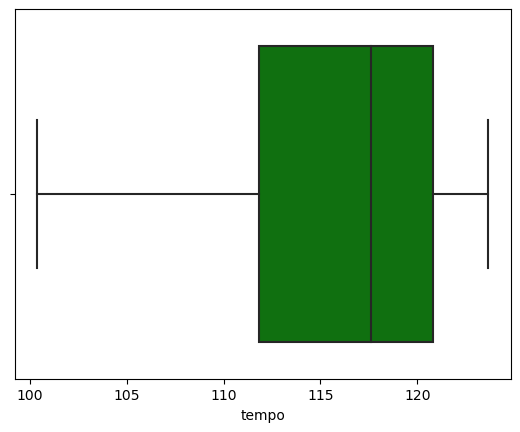

In [18]:
sns.boxplot(dfangka['tempo'], color = 'green')
plt.show()

In [19]:
dfangka.columns.values

array(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key', 'mode'], dtype=object)

C:\Users\sas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sas\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\sas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sas\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.f

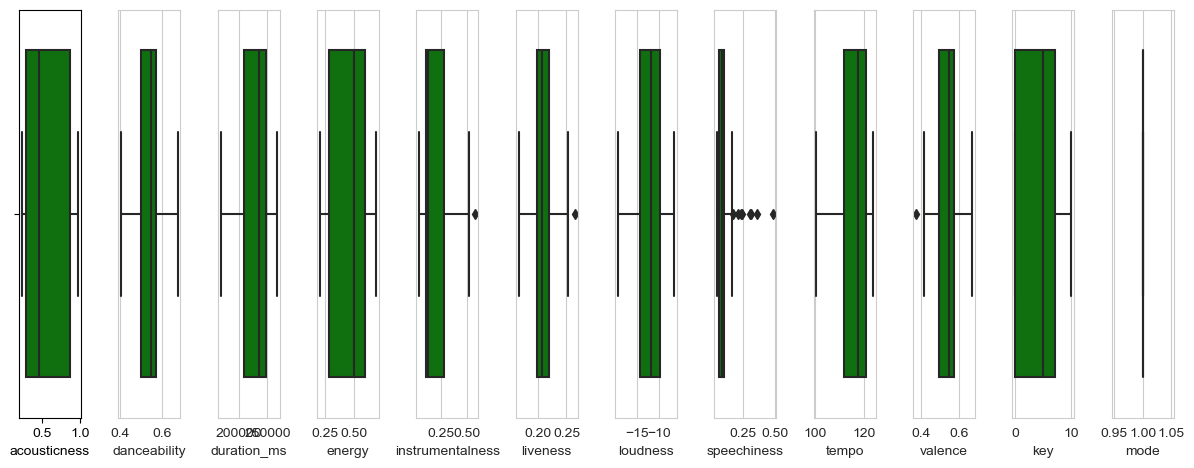

In [23]:
l = dfangka.columns.values
number_of_columns=12
number_of_rows = round(len(l)-1/number_of_columns)
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

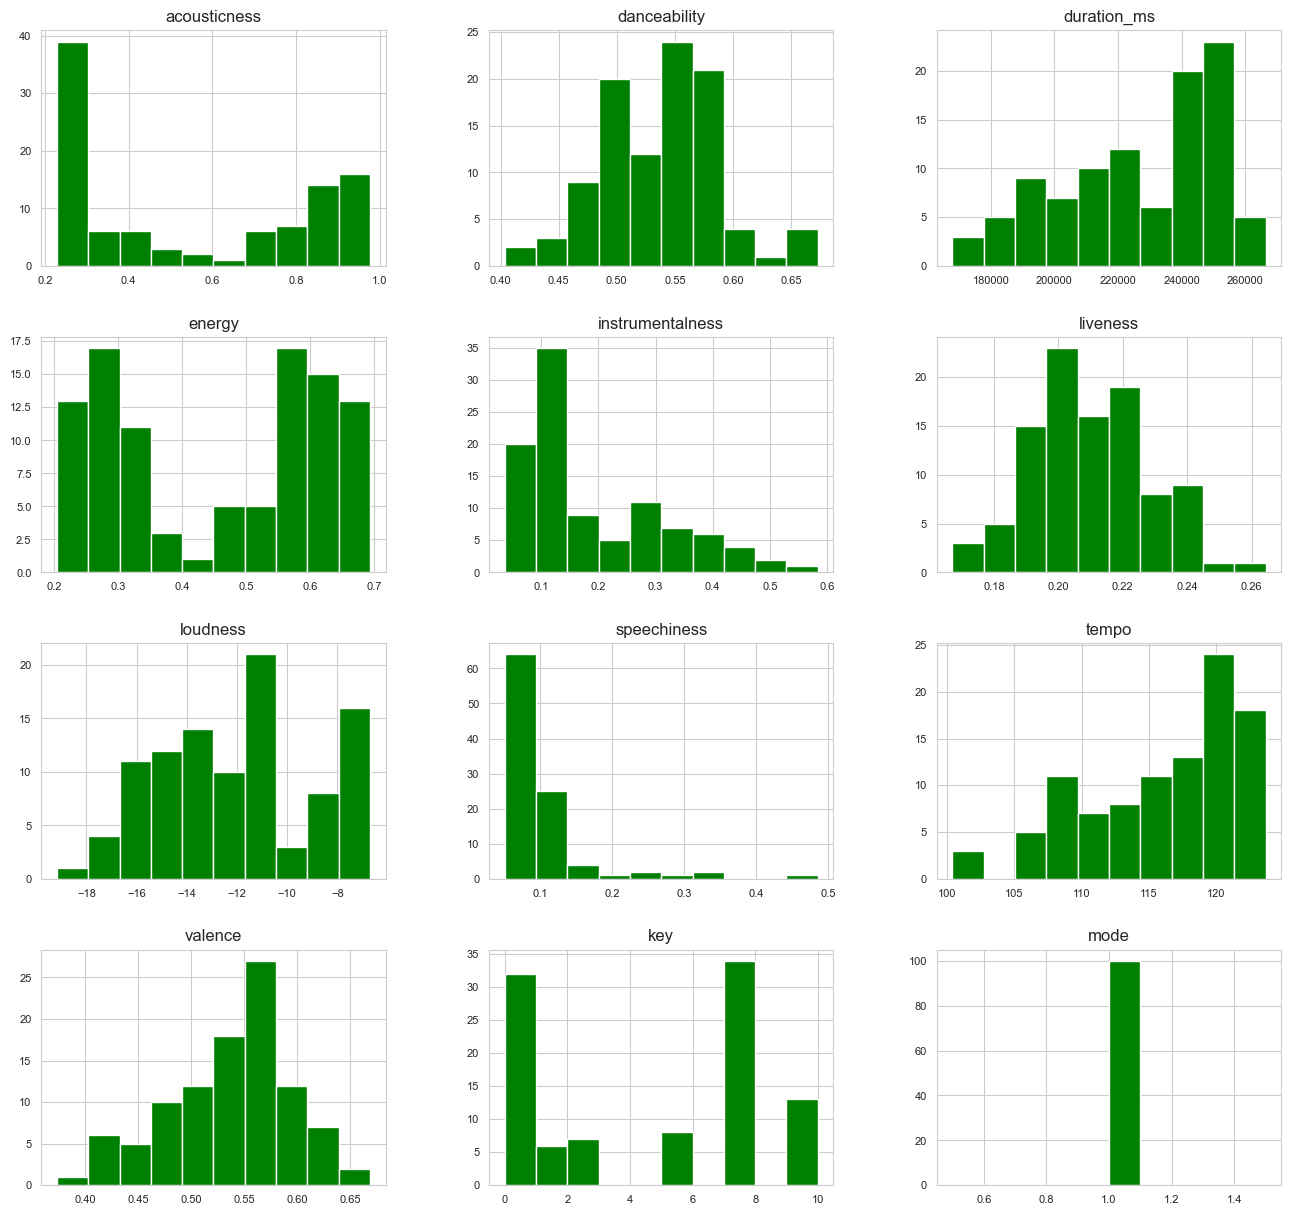

In [24]:
dfangka.hist(figsize=(16, 15), xlabelsize=8, ylabelsize=8, color = "green")
plt.show()

C:\Users\sas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


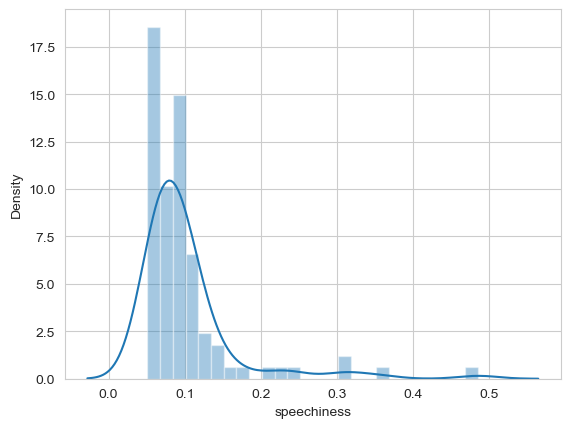

In [25]:
sns.distplot(df['speechiness'])
plt.show()

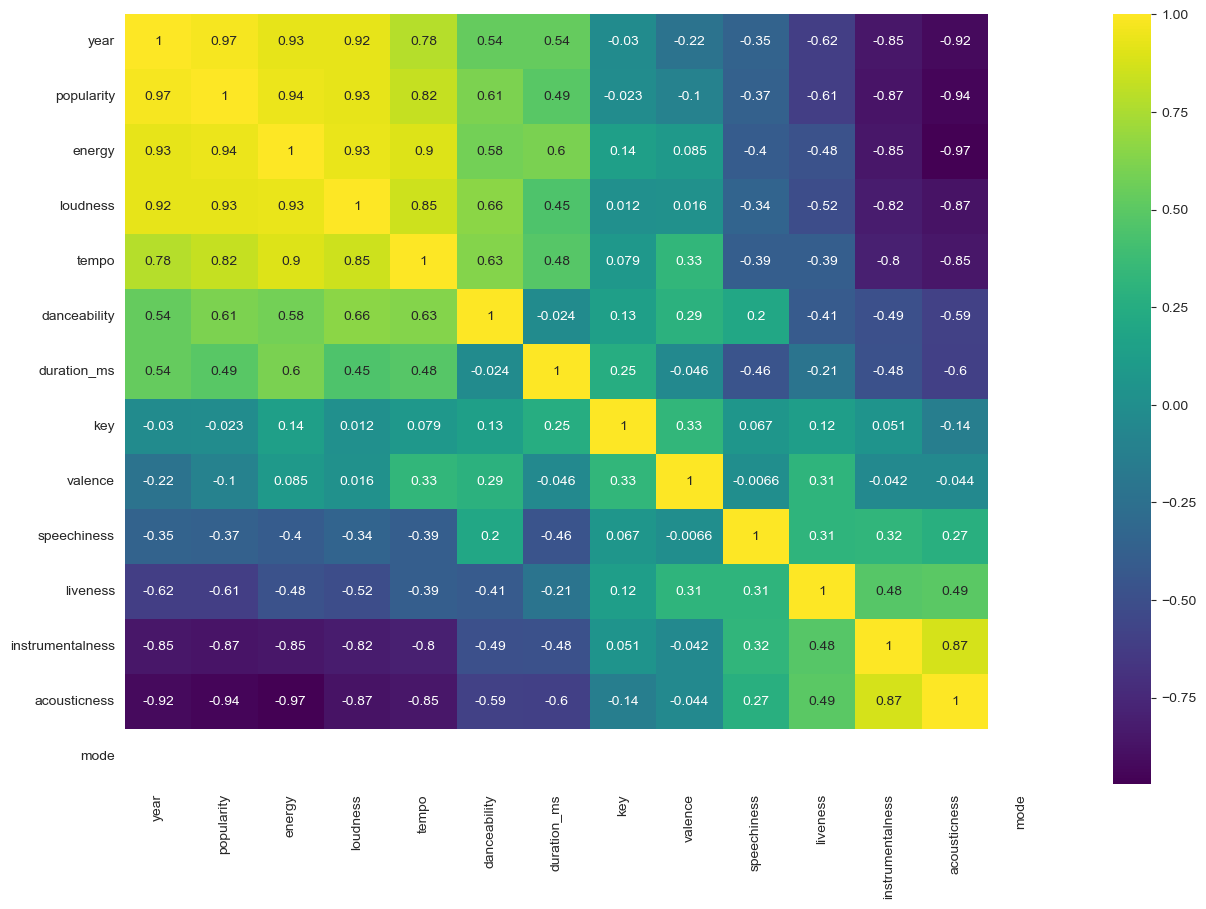

In [26]:
k = 14 #number of variables for heatmap
cols = df.corr().nlargest(k, 'year')['year'].index
cm = df[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.show()

#Jika angka korelasi mendekati 1 maka kedua atribut berhubungan positif.
#Jika angka korelasi mendekati -1 maka kedua atribut berhubungan negatif
# (terbalik)
#Jika mendekati 0 maka kedua atribut tidak berkorelasi

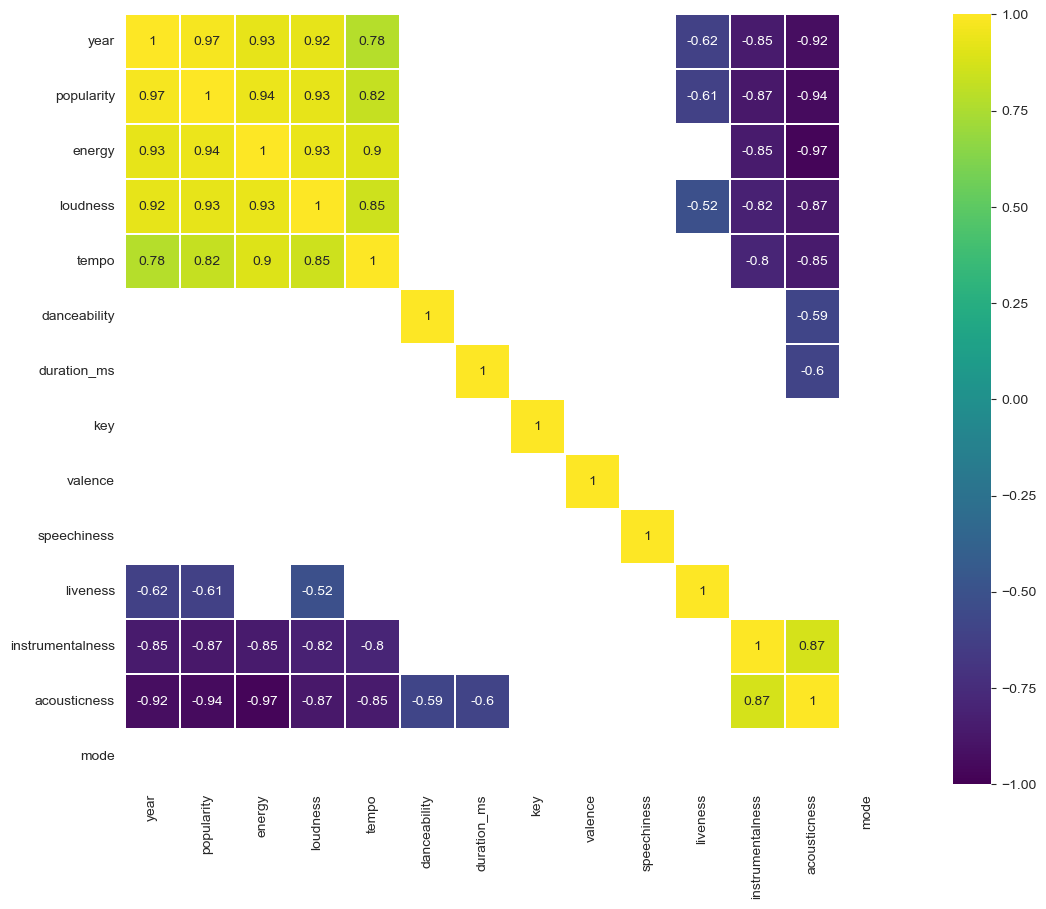

In [27]:
plt.figure(figsize=(15, 10))

sns.heatmap(cm[(cm >= 0.7) | (cm <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, square=True);